In [52]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, linear_model

In [53]:
df = pd.read_excel("SALES_0615_2.xlsx")

In [54]:
df3=df[['Prod Type','毛利','amount']] 
#在'Prod Type'項中，已經事先用excel做過數值取代，將'男裝'和'女裝'取代為1，'日用品'取代為0
#此舉主要是因為Logistic Regression是做二元分類，那我們想看的是其他兩項資料對於'Channel'的二元分類

In [55]:
df3.head(4)
#舉例前四列資料

,Prod Type,毛利,amount
0,1,38.74,448.74
1,1,175.00,575.00
2,1,92.16,220.16
3,0,78.88,110.88


In [56]:
#使用sklearn中的model_selection函式將把資料分為兩群tarin、test，將來可使用test資料來檢驗我們的分類模型效果
#三個變數預測'Channel'(銷售方式)
x=df3[['毛利','amount']]
y=df3[['Prod Type']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) #random_state 種子值


In [57]:
#使用Logistic Regression之前需要先對資料做特徵縮放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [58]:
#將資料放進Logistic Regression開始訓練
from sklearn.linear_model  import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_std,y_train)


c:\users\uniqu\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uniqu\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
#視覺化訓練後的結果
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


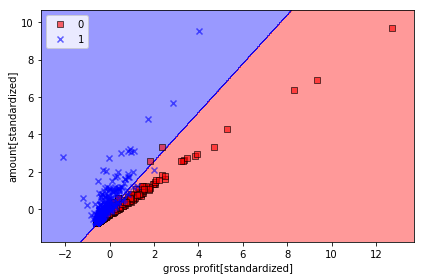

In [60]:
x_train_std= np.squeeze(x_train_std)
y_train= np.squeeze(y_train)
plot_decision_regions(x_train_std, y_train.values, classifier=lr)
plt.xlabel('gross profit[standardized]')
plt.ylabel('amount[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [61]:
#Confusion Matrix
#左上True Negative(TN)「真陰性」:真實情況是「0」，模型說「0」的個數。
#右下True Positive (TP)「真陽性」:真實情況是「1」，模型說「1」的個數。
#右上False Positive (FP)「偽陽性」:真實情況是「0」，模型說「1」的個數。
#左下False Negative(FN)「偽陰性」:真實情況是「1」，模型說「0」的個數。
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

c:\users\uniqu\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[120,  18],
       [ 11, 188]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

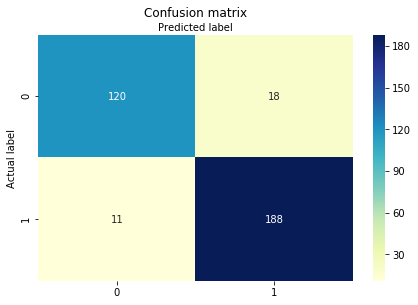

In [62]:
#視覺化混淆矩陣
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
#Accuracy:  138+17/138+17+163+19 =0.45 (45%的準確率)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.913946587537092
Precision: 0.912621359223301
Recall: 0.9447236180904522


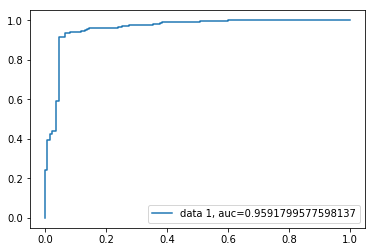

In [64]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
#ROC線離左上角越近的點預測（診斷）準確率越高。離右下角越近的點，預測越不準。
#AUC < 0.5，比隨機猜測還差；但只要總是反預測而行，就優於隨機猜測